#### 시각화 도구
### 1. Matplotlib - 기본 그래프 도구

##### &nbsp;
 __3. 막대 그래프__


막대 그래프는 데이터 값의 크기에 비례하여 높이를 갖는 직사각형 막대로 표현한다. 막대 높이의 상대적 길이 차이를 통해 값의 크고 작음을 설명한다.

세로형 막대 그래프는 시간적으로 차이가 나는 두 점에서 데이터 값의 차이를 잘 설명한다. 즉, 시계열 데이터를 표현하는데 적합하다.

plot() 메소드에 kind='bar'옵션을 입력한다.

In [11]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = r"C:\Users\구남이\Downloads\5674-833_4th\part4\malgun.ttf" # 폰트 파일 위치
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

# Excel 데이터를 데이터프레임으로 변환하기
df = pd.read_excel(r"C:\Users\구남이\Downloads\5674-833_4th\part4\시도별 전출입 인구수.xlsx", engine = 'openpyxl', header = 0)

# 누락값(NaN)을 앞 데이터로 채우기
df = df.fillna(method = 'ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') # 불 자료형
df_seoul = df[mask] # 데이터프레임으로 변환
df_seoul = df_seoul.drop(['전출지별'],axis=1) # 전출지별 열 삭제
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True) # 전입지별 열 이름을 전입지로 변경
df_seoul.set_index('전입지', inplace=True) # '전입지'열을 행 인덱스로 사용

# 서울에서 충청남도, 경상북도, 강원도, 전라남도로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

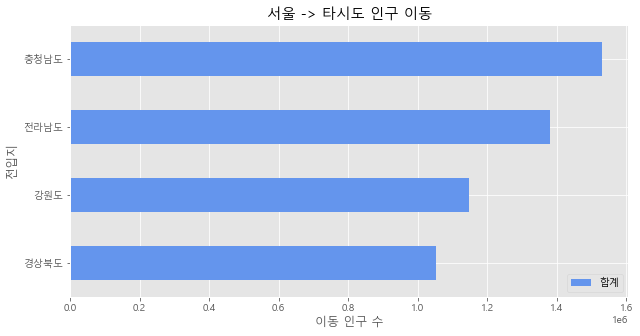

In [12]:
# 2010-2017년 이동 인구 수를 합계하여 새로운 열로 추가
df_4['합계'] = df_4.sum(axis=1)

# 가장 큰 값부터 정렬
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)

# 스타일 서식 지정
plt.style.use('ggplot')

# 수평 막대 그래프 그리기
df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10, 5))

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()

> + 보조 축 활용하기(2축 그래프 그리기)
>
> 기존 축에는 막대 그래프의 값을 표시하고 보조 축에는 선그래프의 값을 표시
>
> 막대 그래프는 연도별 북한의 발전량을 나타내고 선그래프는 북한 발전량의 전년 대비 증감률을 백분률로 나타낸다.
> 
> 증감률 계산 
>
> rename() 메소드로 '합계'열의 이름을 '총발전량'으로 바꾸기
>
> shift() 메소드를 이용하여 '총발전량' 열의 데이터를 1행씩 뒤로 이동시켜서 '총발전량 - 1년'열을 새로 생성하기
>
> 두 열의 데이터를 이용하여 전년도 대비 변동율을 계산한 결과를 '증감률'열에 저장

C:\Users\구남이\AppData\Local\Temp/ipykernel_21168/2414338115.py:15: FutureWarning: convert_float is deprecated and will be removed in a future version
  df = pd.read_excel(r"C:\Users\구남이\Downloads\5674-833_4th\part4\남북한발전전력량.xlsx", engine= 'openpyxl', convert_float=True)


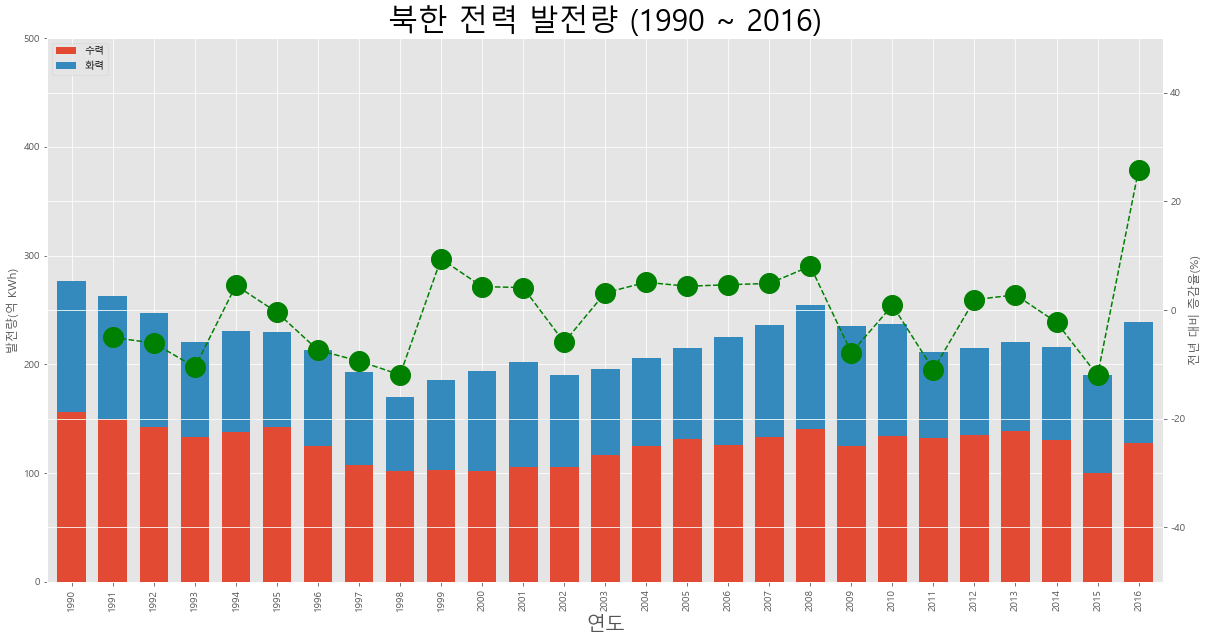

In [5]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = r"C:\Users\구남이\Downloads\5674-833_4th\part4\malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('ggplot')   # 스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False   # 마이너스 부호 출력 설정

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel(r"C:\Users\구남이\Downloads\5674-833_4th\part4\남북한발전전력량.xlsx", engine= 'openpyxl', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T 

# 증감율(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1) # shift() : 열의 데이터를 1행씩 뒤로 이동
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100      

# 2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)  # stacked=True : 열들의 값을 아래 위로 쌓은 형태의 세로형 막대그래프
ax2 = ax1.twinx() # twinx() : 쌍둥이 객체 만들기
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=20,  # ls='--'옵션은 선 스타일을 점선으로 설정
         color='green', label='전년대비 증감율(%)')  

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감율(%)')

plt.title('북한 전력 발전량 (1990 ~ 2016)', size=30)
ax1.legend(loc='upper left')

plt.show()